In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
import numpy as np

In [16]:
a = np.array([1,2,3])
b = np.array([4,5,6])
C = (np.dot(a, b) / np.dot(b, b)) * b
print(a - b)

[-3 -3 -3]


In [2]:
df = pd.read_csv('prop_exp1.csv').iloc[:, :4]
df.columns = ['T', 'F1', 'F2', 'F']
df

,T,F1,F2,F
0,0.000,-0.463081,0.054672,0.408409
1,0.005,-0.458885,0.042053,0.416832
2,0.010,-0.465172,0.046257,0.418915
3,0.015,-0.458885,0.044159,0.414726
4,0.020,-0.465172,0.033646,0.431526
...,...,...,...,...
1375,6.875,-0.180199,-0.008415,0.188614
1376,6.880,-0.178108,-0.012619,0.190727
1377,6.885,-0.182297,-0.012619,0.194916
1378,6.890,-0.182297,-0.006310,0.188606


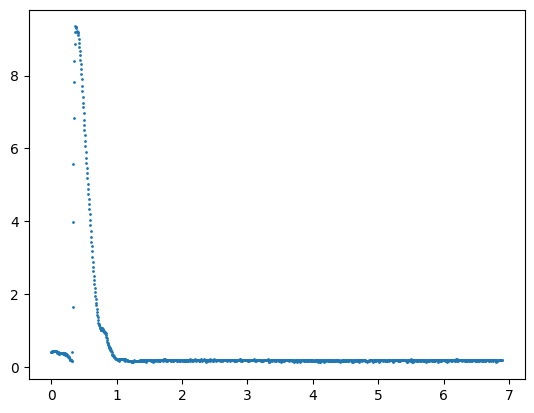

In [3]:
plt.scatter(df['T'], df['F'], s=1)
plt.show()

In [4]:
def find_bg(df, ts, te):
    df = df.copy()
    df = df[(df['T'] >= ts) & (df['T'] <= te)]
    # df['bg'] = df['F'].rolling(window=100).mean()
    return df['F'].mean()

In [5]:
def find_br(df_n, tp):
    st = df_n[(df_n['T'] < tp) & (df_n['F'] < 0)].index[-1]
    en = df_n[(df_n['T'] > tp) & (df_n['F'] < 0)].index[0]
    return st, en

In [6]:
find_bg(df, 2, 7)#.plot(x='T', y='bg')

0.17938433274693877

In [7]:
df_norm = df.copy()
df_norm['F'] -= find_bg(df, 2, 7)

In [8]:
find_br(df_norm, 0.7)

(64, 206)

In [9]:
df_crop = df.copy()
df_crop = df_crop.iloc[find_br(df_norm, 0.7)[0]:find_br(df_norm, 0.7)[1]]

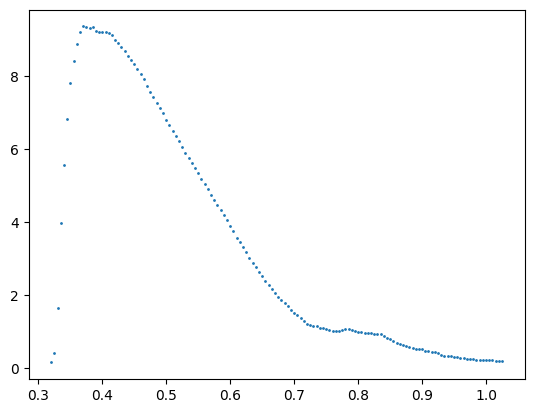

In [10]:
plt.scatter(df_crop['T'], df_crop['F'], s=1)
plt.show()

In [11]:
def norm_crop(df, te, tp):
    df = df.copy()
    df = df[df['T'] >= te]
    bg = df['F'].mean()
    print(bg)
    df_n = df.copy()
    df_n['F'] -= bg
    print(df_n)

    print(df_n[(df_n['T'] < tp) & (df_n['F'] < 1)])
    print(df_n[(df_n['T'] > tp) & (df_n['F'] < 1)])
    st = df_n[(df_n['T'] < tp) & (df_n['F'] < 1)].index[-1]
    en = df_n[(df_n['T'] > tp) & (df_n['F'] < 1)].index[0]
    df_crop = df.iloc[st:en]
    return df_crop

In [12]:
df

,T,F1,F2,F
0,0.000,-0.463081,0.054672,0.408409
1,0.005,-0.458885,0.042053,0.416832
2,0.010,-0.465172,0.046257,0.418915
3,0.015,-0.458885,0.044159,0.414726
4,0.020,-0.465172,0.033646,0.431526
...,...,...,...,...
1375,6.875,-0.180199,-0.008415,0.188614
1376,6.880,-0.178108,-0.012619,0.190727
1377,6.885,-0.182297,-0.012619,0.194916
1378,6.890,-0.182297,-0.006310,0.188606


In [13]:
df_crop = norm_crop(df, 2, 0.7)

0.17938433274693877
          T        F1        F2         F
400   2.000 -0.150864 -0.039955  0.011434
401   2.005 -0.152962 -0.035751  0.009329
402   2.010 -0.155060  0.000000 -0.024325
403   2.015 -0.152962 -0.014725 -0.011698
404   2.020 -0.146675 -0.023132 -0.009577
...     ...       ...       ...       ...
1375  6.875 -0.180199 -0.008415  0.009230
1376  6.880 -0.178108 -0.012619  0.011343
1377  6.885 -0.182297 -0.012619  0.015531
1378  6.890 -0.182297 -0.006310  0.009222
1379  6.895 -0.178108 -0.006310  0.005033

[980 rows x 4 columns]
Empty DataFrame
Columns: [T, F1, F2, F]
Index: []
          T        F1        F2         F
400   2.000 -0.150864 -0.039955  0.011434
401   2.005 -0.152962 -0.035751  0.009329
402   2.010 -0.155060  0.000000 -0.024325
403   2.015 -0.152962 -0.014725 -0.011698
404   2.020 -0.146675 -0.023132 -0.009577
...     ...       ...       ...       ...
1375  6.875 -0.180199 -0.008415  0.009230
1376  6.880 -0.178108 -0.012619  0.011343
1377  6.885 -0.182297 -0

IndexError: index -1 is out of bounds for axis 0 with size 0

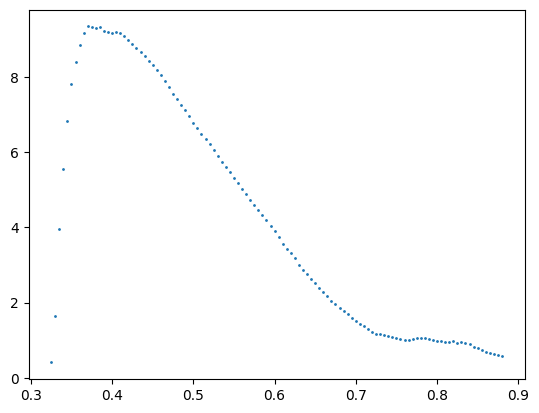

In [ ]:
plt.scatter(df_crop['T'], df_crop['F'], s=1)
plt.show()